In [2]:

import pickle
from alrosademo.KeyFilter import filter_data, work_with_obs_indexes, work_with_obs
import os
path = 'D:/linux_share/Alrosa/selected/preds/'
import cv2
import matplotlib.pyplot as plt

In [3]:
def getframedtonohanda(obs, fpsvalue, frames_count):
    frames_numbers = work_with_obs_indexes(obs)
    frames_numbers = sorted(list(set(frames_numbers)))
    frames_numbers = [0] + frames_numbers + [frames_count]
    secdur = .1
    fpsvalue = 28
    selected = []
    for i in range(1,len(frames_numbers)):
        if frames_numbers[i]-frames_numbers[i-1] > 2:
            # print(frames_numbers[i],frames_numbers[i-1])
            selected.append([j for j in range(frames_numbers[i-1], frames_numbers[i])])
    return selected

In [6]:
bs=[]
o=[]
for i in os.listdir(path):
    try:
        data = pickle.load(open(path+i, 'rb'))
        obs = filter_data(data)
        o+=obs
        visframesdata = work_with_obs(obs)

        vidcap = cv2.VideoCapture('D:/linux_share/Alrosa/selected/source/'+i.split('.')[0]+'_cropped.mp4')
        fps = vidcap.get(cv2.CAP_PROP_FPS)
        frame_count = vidcap.get(cv2.CAP_PROP_FRAME_COUNT)

        meta = {
                'fps': int(round(fps)),
                'duration_sec': int(round(frame_count / fps)),
                'frame_count': int(frame_count),
                'frame_width': int(vidcap.get(cv2.CAP_PROP_FRAME_WIDTH)),
                'frame_height': int(vidcap.get(cv2.CAP_PROP_FRAME_HEIGHT)),
                # 'guid': vidcap.get(cv2.CAP_PROP_GUID),
            }
        s = getframedtonohanda(obs, 30, meta['frame_count'])
        bs+=s
    except:
        print(i)

ind_2_GH060009.pickle
ind_2_GH290009.pickle
ind_3_GH140007.pickle
ind_3_GH290007.pickle
ind_4_GH110005.pickle
ind_4_GH140005.pickle


In [7]:
# visframesdata

In [8]:
import numpy as np
xx,yy=[],[]
m=[]
for i in o:
    for index,ness,flag,keys in i:
        xmin, ymin, xmax, ymax = [
            np.min(keys[:, 0]),
            np.min(keys[:, 1]),
            np.max(keys[:, 0]),
            np.max(keys[:, 1])]
        xx.append(xmax - xmin)
        yy.append(ymax - ymin)
        m.append(max((xmax - xmin), (ymax - ymin)))
        # 7/0

(array([1.700e+02, 1.160e+03, 1.483e+03, 1.767e+03, 1.220e+03, 8.800e+02,
        6.400e+02, 3.120e+02, 3.500e+01, 1.000e+00]),
 array([0.01273881, 0.02592465, 0.0391105 , 0.05229634, 0.06548218,
        0.07866803, 0.09185387, 0.10503971, 0.11822556, 0.1314114 ,
        0.14459724]),
 <a list of 10 Patch objects>)

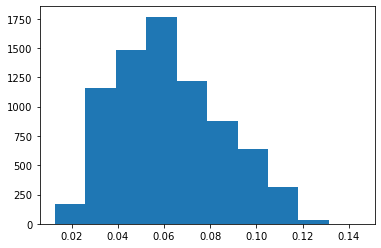

In [9]:
plt.hist(np.array(m)/1920)

(array([2.790e+02, 1.064e+03, 1.500e+03, 1.725e+03, 1.105e+03, 8.830e+02,
        6.940e+02, 3.660e+02, 5.100e+01, 1.000e+00]),
 array([0.00425066, 0.01828532, 0.03231998, 0.04635464, 0.06038929,
        0.07442395, 0.08845861, 0.10249327, 0.11652793, 0.13056259,
        0.14459724]),
 <a list of 10 Patch objects>)

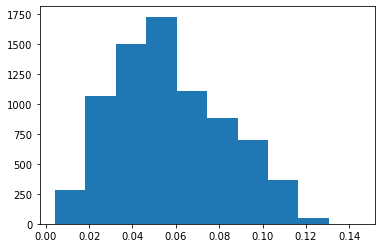

In [10]:
plt.hist(np.array(xx)/1920)

In [20]:
# s = getframedtonohanda(obs, 30, meta['frame_count'])

81 75
85 82
229 222
250 237
351 251
434 431
469 463
475 470
801 792
805 802
814 810
819 816
880 871


(array([102.,  10.,   1.,   1.,   3.,   0.,   2.,   0.,   0.,   0.,   2.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  3.  ,  33.45,  63.9 ,  94.35, 124.8 , 155.25, 185.7 , 216.15,
        246.6 , 277.05, 307.5 , 337.95, 368.4 , 398.85, 429.3 , 459.75,
        490.2 , 520.65, 551.1 , 581.55, 612.  ]),
 <a list of 20 Patch objects>)

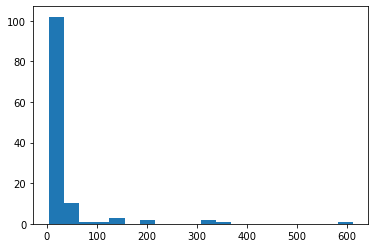

In [24]:
plt.hist([len(i)for i in bs], bins=20)

In [46]:
vidcap = cv2.VideoCapture('D:/linux_share/Alrosa/selected/source/ind_4_GH140005cropped.mp4')
fps = vidcap.get(cv2.CAP_PROP_FPS)
frame_count = vidcap.get(cv2.CAP_PROP_FRAME_COUNT)
print(frame_count)

def getframedtonohanda(obs, fpsvalue, frames_count):
    frames_numbers = work_with_obs_indexes(obs)
    frames_numbers = sorted(list(set(frames_numbers)))
    frames_numbers = [0] + frames_numbers + [frames_count]

    secdur = 3
    fpsvalue=int(fpsvalue)
    frames_count=int(frames_count)
    selected = []
    for i in range(1,len(frames_numbers)):
        if frames_numbers[i]-frames_numbers[i-1] > fpsvalue*secdur:
            # print(frames_numbers[i],frames_numbers[i-1])
            li = [j for j in range(frames_numbers[i-1]+fpsvalue*secdur, frames_numbers[i])]
            # if len(li)<10:
            #     continue
            li = li[::2]
            selected.append(li)
    return selected, frames_numbers

data = pickle.load(open('C:/Users/ivand/Desktop/AlrosaDemo/cache/b7c6dcc577a046f28d2a9703229b7ab7.pickle', 'rb'))
obs = filter_data(data)

2399.0


In [37]:
s, frames_numbers = getframedtonohanda(obs, fps, frame_count)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([ 8.  , 11.45, 14.9 , 18.35, 21.8 , 25.25, 28.7 , 32.15, 35.6 ,
        39.05, 42.5 , 45.95, 49.4 , 52.85, 56.3 , 59.75, 63.2 , 66.65,
        70.1 , 73.55, 77.  ]),
 <a list of 20 Patch objects>)

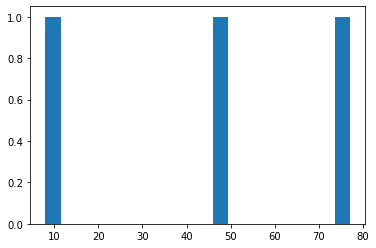

In [32]:
plt.hist([len(i)for i in s], bins=20)

In [33]:
len(s)

3

In [34]:
[len(i)for i in s]


[77, 8, 47]

In [43]:

for i in frames_numbers:
    if i in range(1700,2100):
        print(i)

1700
1701
1743
1744
1745
1746
1747
1748
1749
1750
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1781
1782
1783
1784
1785
1786
1787
1806
1807
1808
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1970
1971
1972
1973
1974
1975
1976
1977
1978
2069
2070
2071
2072


In [42]:
s

[[865,
  867,
  869,
  871,
  873,
  875,
  877,
  879,
  881,
  883,
  885,
  887,
  889,
  891,
  893,
  895,
  897,
  899,
  901,
  903,
  905,
  907,
  909,
  911,
  913,
  915,
  917,
  919,
  921,
  923,
  925,
  927,
  929,
  931,
  933,
  935,
  937,
  939,
  941,
  943,
  945,
  947,
  949,
  951,
  953,
  955,
  957,
  959,
  961,
  963,
  965,
  967,
  969,
  971,
  973,
  975,
  977,
  979,
  981,
  983,
  985,
  987,
  989,
  991,
  993,
  995,
  997,
  999,
  1001,
  1003,
  1005,
  1007,
  1009,
  1011,
  1013,
  1015,
  1017],
 [1954, 1956, 1958, 1960, 1962, 1964, 1966, 1968],
 [2068],
 [2299,
  2301,
  2303,
  2305,
  2307,
  2309,
  2311,
  2313,
  2315,
  2317,
  2319,
  2321,
  2323,
  2325,
  2327,
  2329,
  2331,
  2333,
  2335,
  2337,
  2339,
  2341,
  2343,
  2345,
  2347,
  2349,
  2351,
  2353,
  2355,
  2357,
  2359,
  2361,
  2363,
  2365,
  2367,
  2369,
  2371,
  2373,
  2375,
  2377,
  2379,
  2381,
  2383,
  2385,
  2387,
  2389,
  2391]]

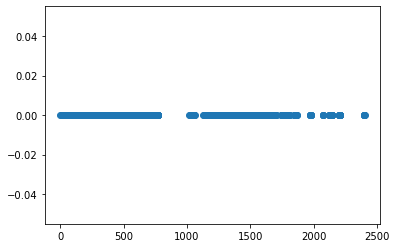

In [45]:
plt.scatter(frames_numbers, [0 for i in range(len(frames_numbers))])

In [56]:
fr=[]
for i in obs:
    for j in i:
        if j[0]>2000:
            print(j)
        fr.append(j[0])

(2049, 0.82465863, 0.0001998259, array([[455.44029137, 665.72767844],
       [449.74351529, 647.13888865],
       [441.42547102, 640.30512999],
       [434.30559752, 637.85376547],
       [427.38415335, 638.74072163],
       [421.17260322, 637.89419088],
       [403.03616137, 636.74562718],
       [393.1242552 , 635.82943053],
       [385.16760969, 635.2055088 ],
       [415.97452942, 645.71881237],
       [397.67725271, 639.28247269],
       [388.29568838, 636.22382916],
       [380.7928076 , 634.01923906],
       [413.512106  , 654.54195505],
       [407.33975873, 651.57793759],
       [413.61848813, 652.92439439],
       [418.33274793, 654.19352247],
       [413.59284836, 663.15926733],
       [412.12028325, 661.23415285],
       [419.03826475, 662.01711459],
       [424.40057532, 662.39322023]]))
(2069, 0.9476268, 0.9904484, array([[510.60961322, 677.85532044],
       [524.11742056, 695.22552842],
       [538.87215388, 701.19792146],
       [549.16641952, 701.65526814],
       [556

In [52]:
fr = sorted(list(set(fr)))

In [53]:
fr

[12,
 14,
 16,
 18,
 21,
 23,
 24,
 26,
 28,
 31,
 33,
 35,
 37,
 39,
 40,
 42,
 44,
 46,
 48,
 51,
 53,
 55,
 57,
 59,
 60,
 62,
 64,
 66,
 68,
 71,
 73,
 75,
 77,
 79,
 80,
 84,
 86,
 88,
 91,
 93,
 95,
 97,
 99,
 101,
 103,
 105,
 107,
 109,
 110,
 112,
 114,
 116,
 118,
 121,
 123,
 125,
 127,
 129,
 130,
 132,
 134,
 136,
 138,
 141,
 143,
 145,
 147,
 149,
 150,
 152,
 154,
 156,
 158,
 161,
 163,
 165,
 167,
 169,
 170,
 172,
 174,
 176,
 178,
 181,
 183,
 185,
 187,
 189,
 190,
 192,
 194,
 196,
 198,
 200,
 202,
 204,
 206,
 208,
 211,
 213,
 215,
 217,
 219,
 220,
 222,
 224,
 226,
 228,
 231,
 233,
 235,
 237,
 239,
 241,
 243,
 245,
 247,
 249,
 250,
 252,
 254,
 256,
 258,
 261,
 263,
 265,
 267,
 269,
 270,
 272,
 274,
 276,
 278,
 281,
 283,
 285,
 287,
 289,
 290,
 292,
 294,
 296,
 298,
 300,
 302,
 304,
 306,
 308,
 311,
 313,
 315,
 317,
 319,
 320,
 322,
 324,
 326,
 328,
 331,
 333,
 335,
 337,
 339,
 340,
 342,
 344,
 346,
 348,
 351,
 353,
 355,
 357,
 359,
 360,

In [54]:
frame_count

2399.0

In [55]:
obs

[[(1002,
   0.95811915,
   0.047113016,
   array([[145.91133396, 490.68904167],
          [143.69898789, 501.7954776 ],
          [146.06499108, 513.67783733],
          [149.53960447, 524.32815472],
          [152.95580623, 532.15837878],
          [155.86935535, 509.59008034],
          [160.28647004, 526.83135349],
          [159.73021354, 535.35195475],
          [159.06618035, 539.64832054],
          [160.07935936, 508.11731933],
          [164.3650263 , 526.19949037],
          [161.90087531, 533.36369658],
          [158.94815917, 535.39973518],
          [162.04690809, 507.93662491],
          [166.09631352, 524.01931264],
          [163.25476937, 529.29420915],
          [160.28316961, 530.14487871],
          [162.92039657, 508.51956616],
          [166.11423178, 520.74697387],
          [164.33698363, 525.80035743],
          [162.42482644, 527.435893  ]]))],
 [(1004,
   0.62197983,
   0.9296153,
   array([[145.74730282, 496.62518719],
          [153.76846025, 505.07080419]